# **"Swiggy Instamart-Style Sales Prediction using Machine Learning"**

(Adapted from BigMart Sales Dataset)

# **🎯 Project Objectives**

**Analyze Sales Trends:**

Explore sales patterns across various products and outlets, similar to platforms like Swiggy Instamart.

**Feature Impact Analysis:**

Perform exploratory data analysis (EDA) to identify key factors influencing sales, such as product type, MRP, outlet type, etc.

**Build Predictive Models:**
Train machine learning models to predict Item Outlet Sales using item-level and store-level features.

**Model Evaluation:**
Use Root Mean Squared Error (RMSE) to evaluate model performance and select the best algorithm.

**Deployment & Reporting:**
Create a complete and professional data science pipeline, including:

Clean code with comments, Visualizations , Model comparison

Final interactive UI using Streamlit (for real-time prediction)


In [ ]:
# ------------------------
# STEP 1: Import Libraries
# ------------------------

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px     # For interactive plots (optional but modern)

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor                         # You are using XGBoost


# Preprocessing & Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Model Saving for Deployment
import joblib                                            # To save model/encoders for Streamlit


print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [ ]:
# --------------------------------------
# STEP 2: Upload dataset in Google Colab
# --------------------------------------

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
# ----------------------------
# STEP 3: Display & Load Dataset
# ----------------------------
for fn in uploaded.keys():
    print(f"✅ Uploaded file: {fn}")

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Preview the first few rows
print("📘 Preview of Train Data:")
display(train.head())

print("\n📗 Preview of Test Data:")
display(test.head())


✅ Uploaded file: test.csv
✅ Uploaded file: train.csv
📘 Preview of Train Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



📗 Preview of Test Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# ----------------------------
# STEP 4: Basic Overview
# ----------------------------

# Check shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Check data types and memory usage
print("\n🧠 Info of Train Data:")
train.info()

# Basic descriptive statistics
print("\n📈 Descriptive Stats:")
display(train.describe())

# Check null values
print("\n🚨 Null Values in Train:")
print(train.isnull().sum())

print("\n🚨 Null Values in Test:")
print(test.isnull().sum())


Train shape: (8523, 12)
Test shape: (5681, 11)

🧠 Info of Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



🚨 Null Values in Train:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

🚨 Null Values in Test:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [ ]:
# ----------------------------
# STEP 5: Handle Missing Data
# ----------------------------

# Fill missing Item_Weight with mean
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

# Fill missing Outlet_Size with mode
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

# Compare missing values side-by-side (after imputation)
print("\n✅ After Filling Nulls:")
missing_df = pd.DataFrame({
    'Train Missing': train.isnull().sum(),
    'Test Missing': test.isnull().sum()
})
display(missing_df)


✅ After Filling Nulls:


/tmp/ipython-input-10-2306858720.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
/tmp/ipython-input-10-2306858720.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,Train Missing,Test Missing
Item_Fat_Content,0,0.0
Item_Identifier,0,0.0
Item_MRP,0,0.0
Item_Outlet_Sales,0,NaN
Item_Type,0,0.0
Item_Visibility,0,0.0
Item_Weight,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
Outlet_Location_Type,0,0.0


In [ ]:
# ----------------------------
# STEP 6: Unique Categories
# ----------------------------

for col in train.select_dtypes(include='object').columns:
    print(f"\n🧠 Unique values in '{col}' (Train Set):")
    print(train[col].value_counts(dropna=False))

for col in test.select_dtypes(include='object').columns:
    print(f"\n📊 Unique values in '{col}' (Test Set):")
    print(test[col].value_counts(dropna=False))

# Store unique values for later inspection
unique_vals_train = {col: train[col].value_counts(dropna=False) for col in train.select_dtypes(include='object').columns}
unique_vals_test = {col: test[col].value_counts(dropna=False) for col in test.select_dtypes(include='object').columns}



🧠 Unique values in 'Item_Identifier' (Train Set):
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

🧠 Unique values in 'Item_Fat_Content' (Train Set):
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

🧠 Unique values in 'Item_Type' (Train Set):
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

🧠 Unique values in 'Outl

In [ ]:
# -------------------------------
# STEP 7: Standardize Categorical Values
# -------------------------------

# 🧼 Standardize inconsistent labels in 'Item_Fat_Content'
# Merge similar values like 'low fat', 'LF' into 'Low Fat', and 'reg' into 'Regular'
fat_replace = {
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
}

# Apply replacements to both datasets
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(fat_replace)
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(fat_replace)

# ✅ Check the results
print("🔍 Unique values in 'Item_Fat_Content' after standardization (Train):")
print(train['Item_Fat_Content'].value_counts())

print("\n🔍 Unique values in 'Item_Fat_Content' after standardization (Test):")
print(test['Item_Fat_Content'].value_counts())


🔍 Unique values in 'Item_Fat_Content' after standardization (Train):
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

🔍 Unique values in 'Item_Fat_Content' after standardization (Test):
Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64


In [ ]:
# -------------------------------
# STEP 8: Feature Engineering
# -------------------------------

# 8.1 🕒 Create 'Outlet_Years' Feature (how old each outlet is)
train['Outlet_Years'] = 2025 - train['Outlet_Establishment_Year']
test['Outlet_Years'] = 2025 - test['Outlet_Establishment_Year']

# 8.2 🛍 Extract 'Item_Category' from first 2 letters of Item_Identifier
train['Item_Category'] = train['Item_Identifier'].apply(lambda x: x[:2])
test['Item_Category'] = test['Item_Identifier'].apply(lambda x: x[:2])

# 8.3 🔢 Encode 'Item_Category' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Item_Category'] = le.fit_transform(train['Item_Category'])
test['Item_Category'] = le.transform(test['Item_Category'])

# 8.4 🗑 Drop unused or redundant columns
cols_to_drop = ['Item_Identifier', 'Outlet_Establishment_Year']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

# ✅ Check resulting columns
print("✅ Feature engineering completed.")
print("Train columns:", train.columns.tolist())


✅ Feature engineering completed.
Train columns: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years', 'Item_Category']


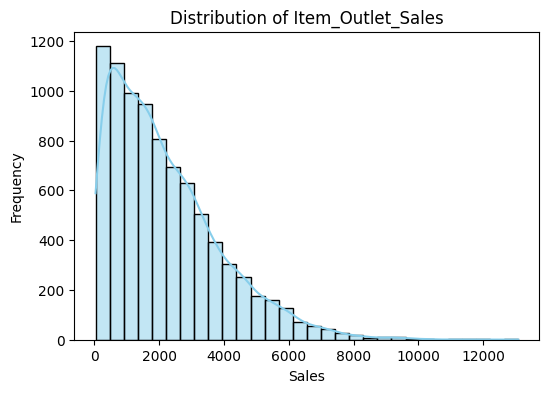

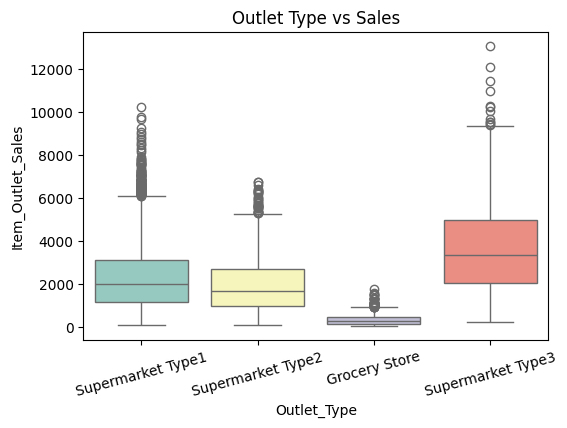

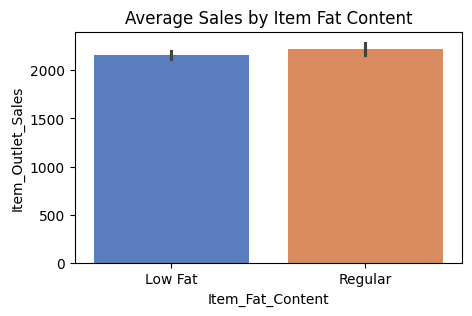

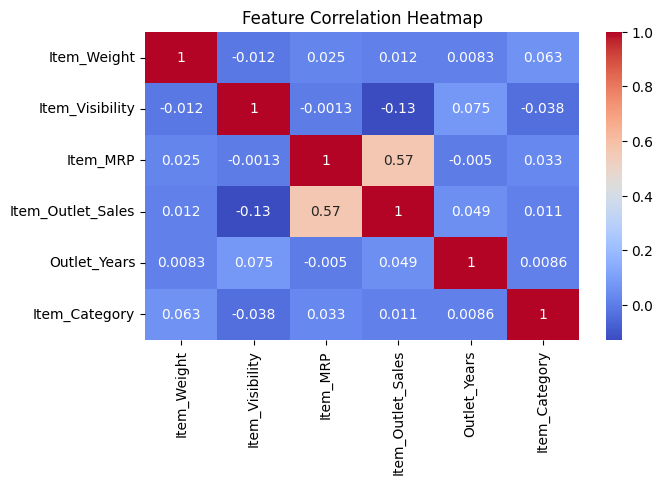

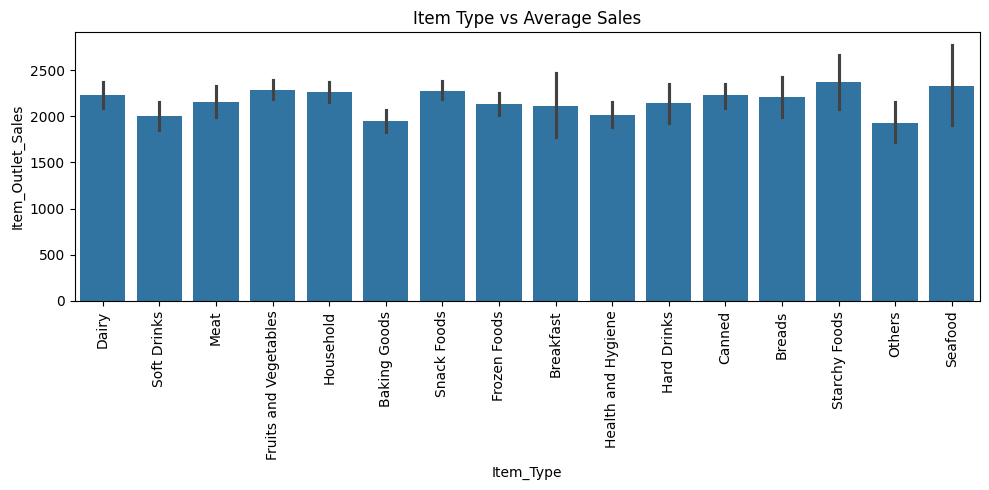

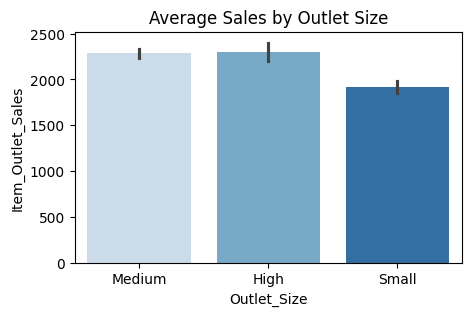

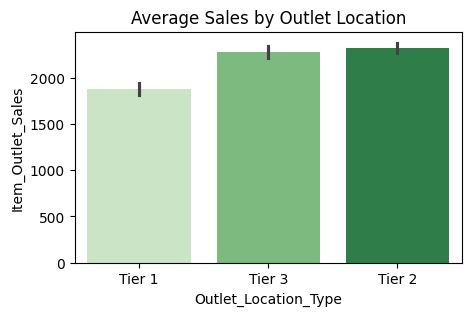

In [ ]:

# --------------------------------------
# STEP 9: Exploratory Data Analysis (EDA) Part-1
# --------------------------------------


# 9.1. 🎯 Target variable distribution (check skewness)
# Distribution of target variable: Item_Outlet_Sales
plt.figure(figsize=(6, 4))
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Item_Outlet_Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


# 9.2. 🏪 Boxplot: Which outlet types sell more?
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=train, palette="Set3", legend=False)
plt.title("Outlet Type vs Sales")
plt.xticks(rotation=15)
plt.show()


# 9.3. 🥫 Barplot: Do fat contents affect sales?
plt.figure(figsize=(5, 3))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=train, palette="muted", legend=False)
plt.title("Average Sales by Item Fat Content")
plt.show()


# 9.4. 🔥 Correlation heatmap: numeric features only
plt.figure(figsize=(7, 4))
sns.heatmap(train.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# 9.5. 🍞 Barplot: Average Sales by Item Type
plt.figure(figsize=(10, 5))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=90)
plt.title("Item Type vs Average Sales")
plt.tight_layout()
plt.show()


# 9.6. 🏢 Barplot: Average Sales by Outlet Size
plt.figure(figsize=(5, 3))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', data=train, palette="Blues", legend=False)
plt.title("Average Sales by Outlet Size")
plt.show()


# 9.7. 🌍 Barplot: Average Sales by Outlet Location Type
plt.figure(figsize=(5, 3))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Location_Type', data=train, palette="Greens", legend=False)
plt.title("Average Sales by Outlet Location")
plt.show()



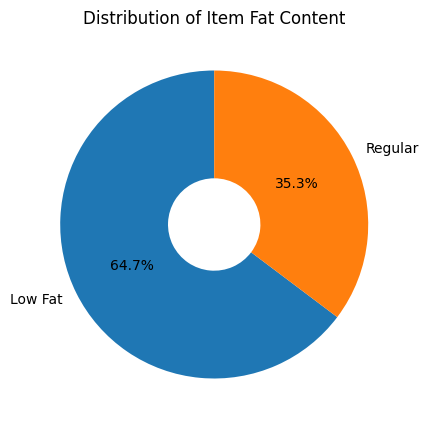

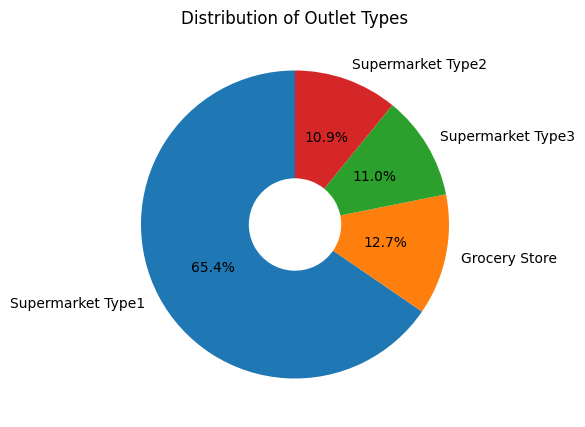

In [ ]:

# --------------------------------------
# STEP 9: Exploratory Data Analysis (EDA) Part-2
# --------------------------------------

#  9.8. 📊 Donut Chart: Item Fat Content Distribution

fat_counts = train['Item_Fat_Content'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(fat_counts, labels=fat_counts.index, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.7))
plt.title("Distribution of Item Fat Content")
plt.show()

# 9.9. 📊 Donut Chart: Outlet Type Distribution
outlet_counts = train['Outlet_Type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(outlet_counts, labels=outlet_counts.index, startangle=90, autopct='%1.1f%%', wedgeprops=dict(width=0.7))
plt.title("Distribution of Outlet Types")
plt.show()


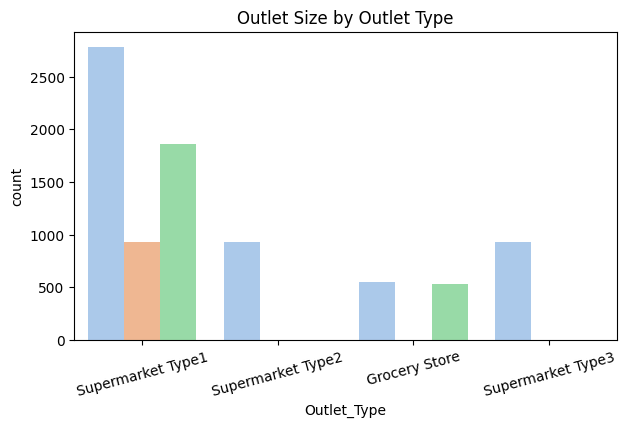

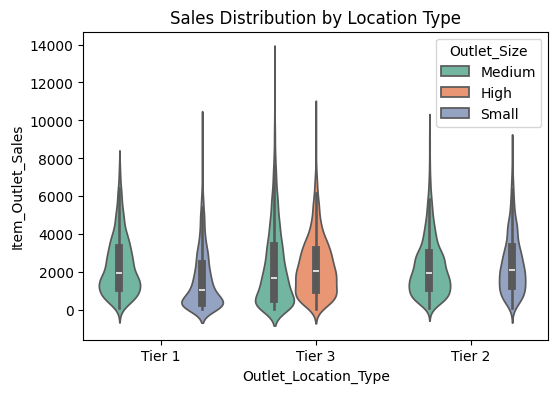

In [ ]:

# --------------------------------------
# STEP 9: Exploratory Data Analysis (EDA) Part-3
# --------------------------------------

#  9.10. 📊 Grouped Bar Chart: Outlet Type vs Size
plt.figure(figsize=(7, 4))
sns.countplot(x='Outlet_Type', hue='Outlet_Size', data=train, palette="pastel", legend=False)
plt.title("Outlet Size by Outlet Type")
plt.xticks(rotation=15)
plt.show()


#  9.11. 📊 Violin Plot: Sales by Outlet Location
plt.figure(figsize=(6, 4))
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=train, palette="Set2")
plt.title("Sales Distribution by Location Type")
plt.show()




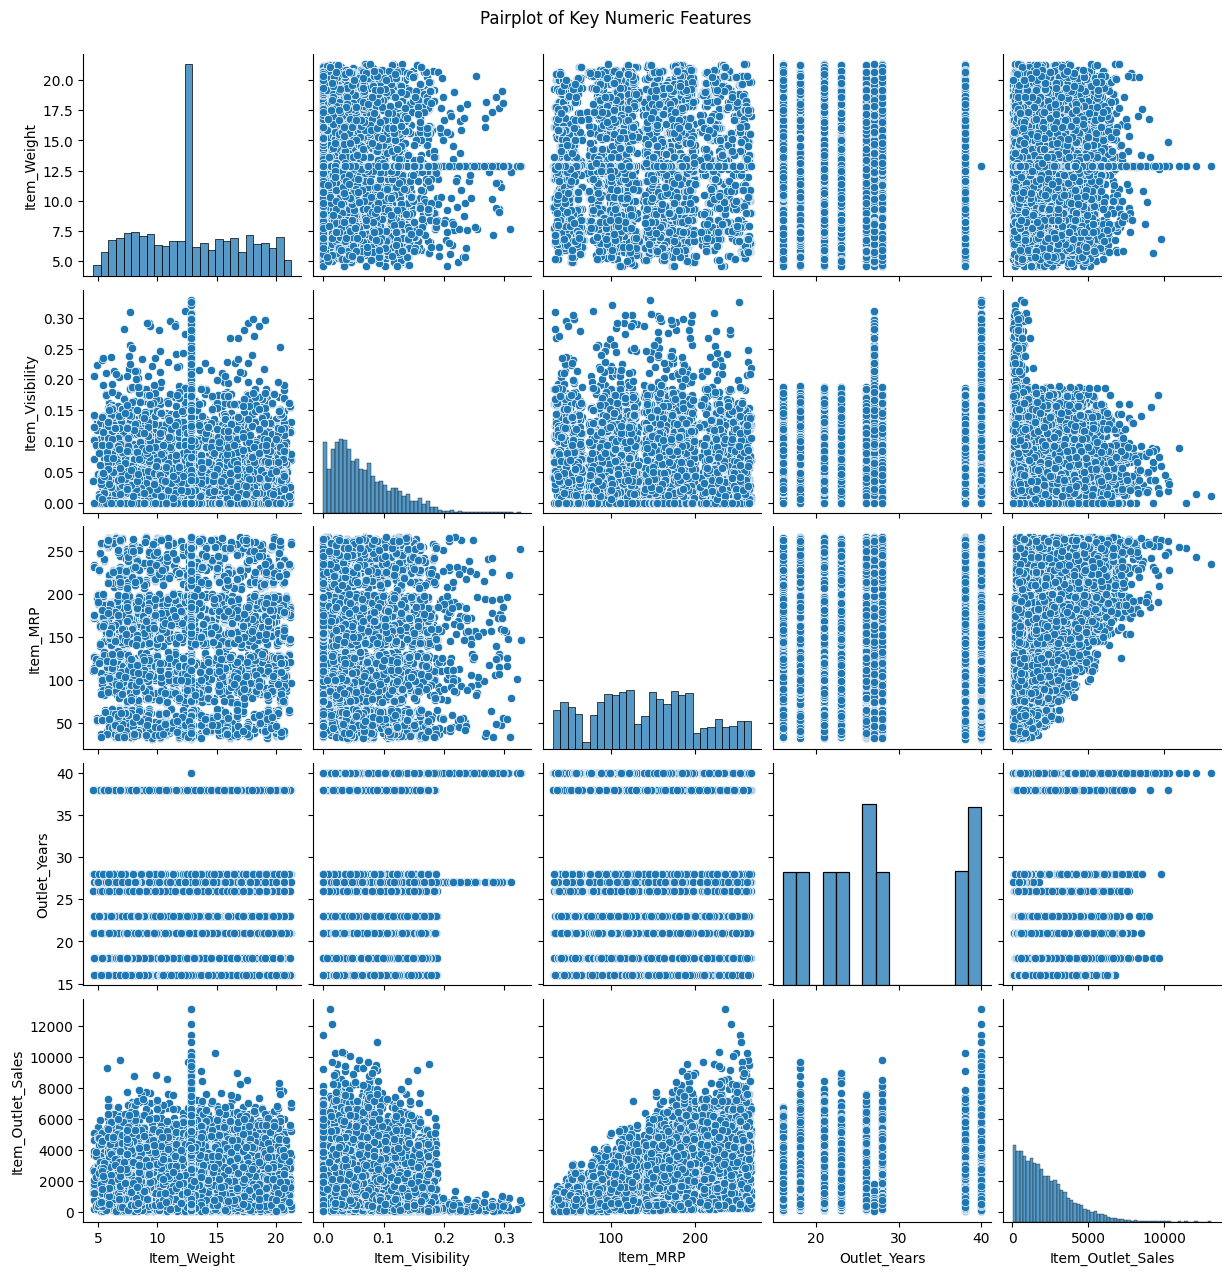

In [ ]:

# --------------------------------------
# STEP 9: Exploratory Data Analysis (EDA) Part-4
# --------------------------------------

# 9.12. 📈 Pairplot to explore numeric features
sns.pairplot(train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years', 'Item_Outlet_Sales']])
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()


In [ ]:
# --------------------------------------
# STEP 10: Encode Categorical Variables
# --------------------------------------
# Convert all object-type features into numeric using Label Encoding

# Make copies of original data
train_encoded = train.copy()
test_encoded = test.copy()

# Identify categorical columns
cat_cols = train_encoded.select_dtypes(include='object').columns
encoders = {}

# Apply Label Encoding to each categorical column
for col in cat_cols:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])
    test_encoded[col] = le.transform(test_encoded[col])
    encoders[col] = le  # Store encoder for later use

# Save encoders for deployment (used during prediction or UI input)
for col, le in encoders.items():
    joblib.dump(le, f"le_{col}.pkl")

print("✅ Categorical encoding complete and encoders saved.")




✅ Categorical encoding complete and encoders saved.


In [ ]:
# --------------------------------------
# STEP 11: Prepare Data for Modeling
# --------------------------------------

# 11.1 🎯 Define target and features
target = 'Item_Outlet_Sales'
X = train_encoded.drop(columns=[target])
y = train_encoded[target]

# 11.2 🔁 Log transform the target to reduce skewness
y_log = np.log1p(y)  # log1p handles zero and positive values safely

# 11.3 ✂️ Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print("✅ Data is ready for model training.")


✅ Data is ready for model training.


In [ ]:

# --------------------------------------
# STEP 12: Train & Evalute Tandom Forest
# --------------------------------------

# 12.1 🚀 Initialize the model
rand_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 12.2 📈 Train the model
rand_forest_model.fit(X_train, y_train)

# 12.3 🔍 Predict on validation set
y_val_pred_log = rand_forest_model.predict(X_val)

# 12.4 🔁 Inverse log transform
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

# 12.5 📊 Evaluate the model

rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print(f"✅ Random Forest RMSE: {round(rmse, 2)}")
print(f"✅ Random Forest R² Score: {round(r2, 2)}")


✅ Random Forest RMSE: 1109.66
✅ Random Forest R² Score: 0.55


In [ ]:
# --------------------------------------
# STEP 13: Train & Evaluate XGBoost
# --------------------------------------

from xgboost import XGBRegressor

# 13.1 🚀 Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# 13.2 📈 Train the model
xgb_model.fit(X_train, y_train)

# 13.3 🔍 Predict on validation set
y_val_pred_log = xgb_model.predict(X_val)

# 13.4 🔁 Inverse log transform
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

# 13.5 📊 Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print(f"✅ XGBoost RMSE: {round(rmse, 2)}")
print(f"✅ XGBoost R² Score: {round(r2, 2)}")


✅ XGBoost RMSE: 1072.41
✅ XGBoost R² Score: 0.58


In [ ]:
# ----------------------------------------------
# STEP 14: Train & Evaluate Linear Regression
# ----------------------------------------------

from sklearn.linear_model import LinearRegression

# 14.1 🚀 Initialize the model
lin_reg_model = LinearRegression()

# 14.2 📈 Train the model
lin_reg_model.fit(X_train, y_train)

# 14.3 🔍 Predict on validation set
y_val_pred_log = lin_reg_model.predict(X_val)

# 14.4 🔁 Inverse log transform
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

# 14.5 📊 Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print(f"✅ Linear Regression RMSE: {round(rmse, 2)}")
print(f"✅ Linear Regression R² Score: {round(r2, 2)}")


✅ Linear Regression RMSE: 1277.99
✅ Linear Regression R² Score: 0.4


In [ ]:
# --------------------------------------------
# STEP 15: Train & Evaluate Gradient Boosting
# --------------------------------------------


from sklearn.ensemble import GradientBoostingRegressor

# 15.1 🚀 Initialize the model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 15.2 📈 Train the model
gbr_model.fit(X_train, y_train)

# 15.3 🔍 Predict on validation set
y_val_pred_log = gbr_model.predict(X_val)

# 15.4 🔁 Inverse log transform
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

# 15.5 📊 Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print(f"✅ Gradient Boosting RMSE: {round(rmse, 2)}")
print(f"✅ Gradient Boosting R² Score: {round(r2, 2)}")


✅ Gradient Boosting RMSE: 1054.31
✅ Gradient Boosting R² Score: 0.59


In [ ]:
!pip install catboost

In [ ]:
# --------------------------------------------
# STEP 16: Train & Evaluate CatBoostRegressor
# --------------------------------------------

from catboost import CatBoostRegressor


# 16.1 🚀 Initialize the model
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0  # suppress training output
)

# 16.2 📈 Train the model
cat_model.fit(X_train, y_train)

# 16.3 🔍 Predict on validation set
y_val_pred_log = cat_model.predict(X_val)

# 16.4 🔁 Inverse log transform
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

# 16.5 📊 Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print(f"✅ CatBoost RMSE: {round(rmse, 2)}")
print(f"✅ CatBoost R² Score: {round(r2, 2)}")


✅ CatBoost RMSE: 1060.18
✅ CatBoost R² Score: 0.59


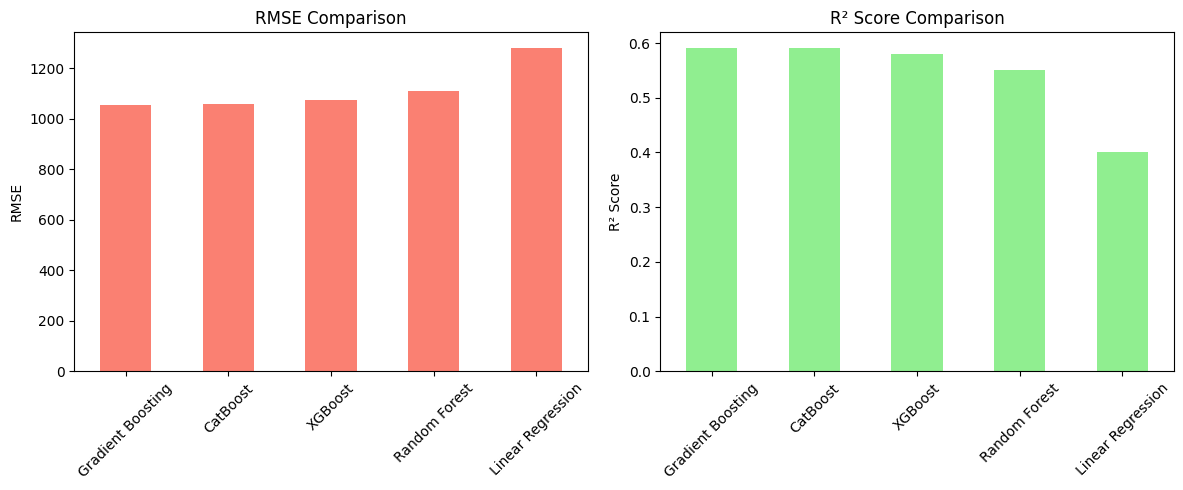

📊 Model Performance Table:


,Model,RMSE,R2
4,Gradient Boosting,1054.31,0.59
3,CatBoost,1060.18,0.59
2,XGBoost,1072.41,0.58
1,Random Forest,1109.66,0.55
0,Linear Regression,1277.99,0.40


In [ ]:
# --------------------------------------------
# STEP 17: Model Comparison
# --------------------------------------------

# Model performance summary
model_scores = {
    "Linear Regression": {'RMSE': 1277.99, 'R2': 0.40},
    "Random Forest":     {'RMSE': 1109.66, 'R2': 0.55},
    "XGBoost":           {'RMSE': 1072.41, 'R2': 0.58},
    "CatBoost":          {'RMSE': 1060.18, 'R2': 0.59},
    "Gradient Boosting": {'RMSE': 1054.31, 'R2': 0.59}
}

# Convert to DataFrame
df_scores = pd.DataFrame(model_scores).T  # Transpose for easy plotting
df_scores.index.name = "Model"
df_scores.reset_index(inplace=True)  # For cleaner table

# Plotting RMSE and R2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RMSE Plot
df_scores.sort_values('RMSE')['RMSE'].plot(kind='bar', ax=axes[0], color='salmon')
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")
axes[0].set_xticks(range(len(df_scores)))
axes[0].set_xticklabels(df_scores.sort_values('RMSE')['Model'], rotation=45)

# R² Score Plot
df_scores.sort_values('R2', ascending=False)['R2'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("R² Score Comparison")
axes[1].set_ylabel("R² Score")
axes[1].set_xticks(range(len(df_scores)))
axes[1].set_xticklabels(df_scores.sort_values('R2', ascending=False)['Model'], rotation=45)

plt.tight_layout()
plt.show()

# 📋 Display table
print("📊 Model Performance Table:")
display(df_scores.sort_values("RMSE"))  # or sort by R2 if needed


In [ ]:
# ---------------------------------------------------------------------
# STEP 18: Model Improvement - Hyperparameter Tuning for Gradient Boosting
# ---------------------------------------------------------------------

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the base model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid search with 3-fold CV
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_gbr.fit(X_train, y_train)

# Best model
best_gbr = grid_search_gbr.best_estimator_

# Predict and evaluate
y_val_pred_log = best_gbr.predict(X_val)
y_val_pred = np.expm1(y_val_pred_log)
y_val_actual = np.expm1(y_val)

rmse = np.sqrt(mean_squared_error(y_val_actual, y_val_pred))
r2 = r2_score(y_val_actual, y_val_pred)

print("✅ Tuned Gradient Boosting RMSE:", round(rmse, 2))
print("✅ Tuned Gradient Boosting R²:", round(r2, 2))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
✅ Tuned Gradient Boosting RMSE: 1056.81
✅ Tuned Gradient Boosting R²: 0.59


In [ ]:
# -------------------------------------------------------
# STEP 19: Model Improvement - XGBoost Tuning with RandomizedSearchCV
# -------------------------------------------------------

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
}

xgb = XGBRegressor(random_state=42)
search = RandomizedSearchCV(xgb, param_distributions=params, cv=3, scoring='neg_root_mean_squared_error', n_iter=10, verbose=1)
search.fit(X_train, y_train)

# Best model
best_xgb = search.best_estimator_

# Evaluate
y_pred_log = best_xgb.predict(X_val)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_val)

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

print("🔧 Tuned XGBoost RMSE:", round(rmse, 2))
print("🔧 Tuned XGBoost R²:", round(r2, 2))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔧 Tuned XGBoost RMSE: 1051.69
🔧 Tuned XGBoost R²: 0.59


✅ Excel file saved: Model_Performance_Summary.xlsx


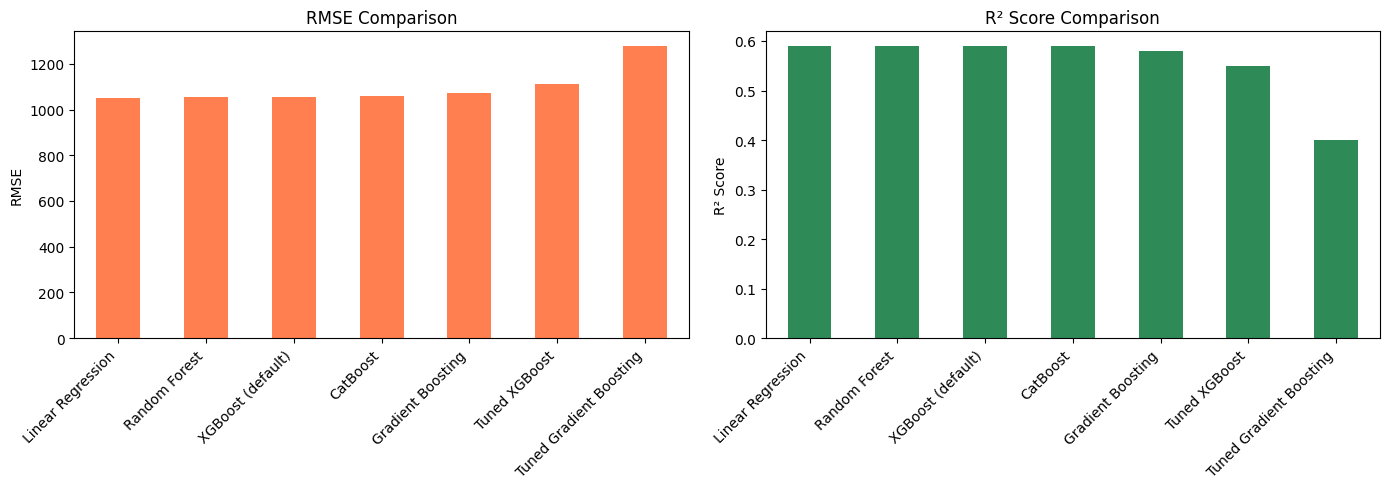

In [ ]:
# --------------------------------------------
# STEP 20: Final Model Performance Summary & Visualization
# --------------------------------------------

# This step summarizes the RMSE and R² scores of all baseline and tuned models,
# saves the results to an Excel file, and visualizes the comparison using bar plots.


# Updated Model performance summary (with tuned models)
model_scores = {
    "Linear Regression":        {'RMSE': 1277.99, 'R2': 0.40},
    "Random Forest":            {'RMSE': 1109.66, 'R2': 0.55},
    "XGBoost (default)":        {'RMSE': 1072.41, 'R2': 0.58},
    "CatBoost":                 {'RMSE': 1060.18, 'R2': 0.59},
    "Gradient Boosting":        {'RMSE': 1054.31, 'R2': 0.59},
    "Tuned XGBoost":            {'RMSE': 1051.69, 'R2': 0.59},
    "Tuned Gradient Boosting":  {'RMSE': 1056.81, 'R2': 0.59}
}

# Convert to DataFrame
df_scores = pd.DataFrame(model_scores).T.round(2)

# Save to Excel
output_filename = "Model_Performance_Summary.xlsx"
df_scores.to_excel(output_filename, sheet_name='Scores', index=True)

print(f"✅ Excel file saved: {output_filename}")


# Convert to DataFrame
df_scores = pd.DataFrame(model_scores).T  # Transpose for plotting

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE Barplot
df_scores['RMSE'].sort_values().plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")
axes[0].set_xticklabels(df_scores.index, rotation=45, ha='right')

# R² Score Barplot
df_scores['R2'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='seagreen')
axes[1].set_title("R² Score Comparison")
axes[1].set_ylabel("R² Score")
axes[1].set_xticklabels(df_scores.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------------------------
# STEP 21: Styled Model Performance Table (Highlight Best RMSE & R²)
# -------------------------------------------------

# This step displays a styled DataFrame to visually highlight:
# ✅ The model with the lowest RMSE (light green)
# ✅ The model with the highest R² (light blue)

# Convert the dictionary to a DataFrame
df_scores = pd.DataFrame(model_scores).T

# Round the values for cleaner display
df_scores = df_scores.round(2)

# Styled table
styled_table = df_scores.style\
    .highlight_min(subset='RMSE', color='lightgreen')\
    .highlight_max(subset='R2', color='lightblue')\
    .set_caption("🔍 Model Performance Summary")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('color', '#2a2a2a'), ('font-weight', 'bold')]
    }])\
    .format({'RMSE': '{:.2f}', 'R2': '{:.2f}'})

styled_table


,RMSE,R2
Linear Regression,1277.99,0.40
Random Forest,1109.66,0.55
XGBoost (default),1072.41,0.58
CatBoost,1060.18,0.59
Gradient Boosting,1054.31,0.59
Tuned XGBoost,1051.69,0.59
Tuned Gradient Boosting,1056.81,0.59


In [ ]:
# --------------------------------------------
# STEP 22: Final Model Training on Full Data (XGBoost)
# --------------------------------------------

from xgboost import XGBRegressor


# ✅ Final Step: Finalize Model & Predict on Test Data
# 🔁 Retrain Tuned XGBoost on Full Training Data
# Final model with best hyperparameters (from tuning)
final_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Use the full training data (X and y_log) — not X_train/X_val
final_model.fit(X, y_log)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# --------------------------------------------
# STEP 23: Final Predictions on Test Set & Export to Excel
# --------------------------------------------

# Predict on the test set
test_preds_log = final_model.predict(test_encoded)

# Inverse log transform
test_preds = np.expm1(test_preds_log)


# Prepare submission DataFrame
submission = pd.DataFrame({
    "Outlet_Identifier": test['Outlet_Identifier'],
    "Predicted_Sales": test_preds.round(2)
})

# Save to Excel
submission.to_excel("Final_Predictions.xlsx", index=False)

print("✅ Final predictions saved to Final_Predictions.xlsx")


✅ Final predictions saved to Final_Predictions.xlsx


In [ ]:
# --------------------------------------------
# STEP 24: Example – Predict Sales for a Single Test Row
# --------------------------------------------

# ✅ Predicts on one encoded test instance
# ✅ Applies inverse log transformation to get actual predicted sales

sample = test_encoded.iloc[[0]]  # select one row
pred_log = final_model.predict(sample)  # predict in log scale
pred_sales = np.expm1(pred_log)         # reverse log to get actual sales
print("Predicted Sales:", round(pred_sales[0], 2))


Predicted Sales: 1474.28


In [ ]:
# --------------------------------------------
# STEP 25: Save Final XGBoost Model to Disk
# --------------------------------------------


import joblib

# Save the final XGBoost model to a file
joblib.dump(final_model, "xgboost_final_model.pkl")

print("✅ Model saved as xgboost_final_model.pkl")


✅ Model saved as xgboost_final_model.pkl


In [ ]:
# --------------------------------------------
# STEP 26: Interactive Prediction with Saved XGBoost Model
# --------------------------------------------

# ✅ Load trained model and encoders
# ✅ Accept user inputs (product & outlet features)
# ✅ Transform input and predict sales using the model
# ✅ Output actual predicted sales value (₹)

import joblib
import pandas as pd
import numpy as np

# ---------------------------------
# Load the trained XGBoost model
# ---------------------------------
model = joblib.load("xgboost_final_model.pkl")

# -----------------------------
# 1️⃣ Define feature order
# -----------------------------
feature_names = [
    'Item_Weight',
    'Item_Fat_Content',
    'Item_Visibility',
    'Item_Type',
    'Item_MRP',
    'Outlet_Identifier',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
    'Outlet_Years',
    'Item_Category'
]

# -----------------------------
# 2️⃣ Input user values safely
# -----------------------------
print("📥 Please enter the following product & outlet details:")

user_input = {}

# Numeric Inputs
user_input['Item_Weight'] = float(input("Item Weight (e.g., 10.5): "))
user_input['Item_Visibility'] = float(input("Item Visibility (e.g., 0.05): "))
user_input['Item_MRP'] = float(input("Item MRP (e.g., 250): "))
user_input['Outlet_Years'] = int(input("Years Since Established (e.g., 20): "))

# Text Inputs
user_input['Item_Fat_Content'] = input("Item Fat Content (Low Fat / Regular): ").strip().title()
user_input['Item_Type'] = input("Item Type (choose from: 'Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood'): ").strip()
user_input['Outlet_Identifier'] = input("Outlet Identifier (choose from 'OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019'): ").strip()
user_input['Outlet_Size'] = input("Outlet Size (Small / Medium / High): ").strip().title()
user_input['Outlet_Location_Type'] = input("Outlet Location Type (Tier 1 / Tier 2 / Tier 3): ").strip().title()
user_input['Outlet_Type'] = input("Outlet Type (choose from: 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'): ").strip()


# Safe input for Item_Category (numeric version)
category_map = {"DR": 0, "FD": 1, "NC": 2}
while True:
    val = input("Item Category Code (DR / FD / NC): ").strip().upper()
    if val in category_map:
        user_input['Item_Category'] = category_map[val]
        break
    else:
        print("❌ Invalid input. Please enter DR, FD, or NC.")

# -----------------------------
# 3️⃣ Convert to DataFrame
# -----------------------------
user_df = pd.DataFrame([user_input])[feature_names]

# -----------------------------
# 4️⃣ Apply Label Encoding
# -----------------------------
encoders = {}
categorical_cols = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type'
]

for col in categorical_cols:
    encoder_path = f'le_{col}.pkl'
    le = joblib.load(encoder_path)
    user_df[col] = le.transform(user_df[col])
    encoders[col] = le

# -----------------------------
# 5️⃣ Predict using XGBoost model
# -----------------------------
y_pred_log = model.predict(user_df)
predicted_sales = np.expm1(y_pred_log)[0]  # Inverse log1p to get original sales

print(f"\n💰 Predicted Sales: ₹{round(predicted_sales, 2)}")


📥 Please enter the following product & outlet details:
Item Weight (e.g., 10.5): 10.2
Item Visibility (e.g., 0.05): 0.02
Item MRP (e.g., 250): 222
Years Since Established (e.g., 20): 21
Item Fat Content (Low Fat / Regular): Low Fat
Item Type (choose from: 'Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood'): Others
Outlet Identifier (choose from 'OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019'): OUT019
Outlet Size (Small / Medium / High): Medium
Outlet Location Type (Tier 1 / Tier 2 / Tier 3): Tier 2
Outlet Type (choose from: 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'): Grocery Store
Item Category Code (DR / FD / NC): DR

💰 Predicted Sales: ₹795.7899780273438


In [ ]:
## Download Model for Deployment

files.download("xgboost_final_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>